In [62]:
import numpy as np
import sklearn.datasets as ds 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model

np.random.seed(123458)

# Let's generate some data:

Text(0, 0.5, 'selling price increasing bottom to top')

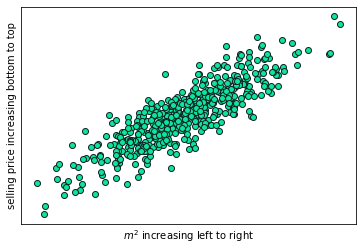

In [63]:
n_samples = 500
X, y = ds.make_regression(n_samples=n_samples, n_features=1, noise=30) 

#plot the data
fig, ax = plt.subplots()

ax.scatter(x=X, y=y, color="#0de599", edgecolor="#10222a")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$m^2$ increasing left to right')
ax.set_ylabel('selling price increasing bottom to top')

# Let's calulate our model:

In [64]:
# linear function f(x) = w^T*x + w_0*1, where w_0 is the bias
# linear function f(x) can be reformulated to f(x) = [w, w_0]^T * [x,1], only one matrix multiplication, no addition
ones = np.ones((len(X), 1))
print('Ones shape: {}'.format(str(ones.shape)))
print('Data shape: {}'.format(str(X.shape)))

X_aug = np.hstack((ones,X))
print('Augmented shape: {}'.format(str(X_aug.shape)))
print('\nExample datapoint :' + str(X_aug[2]))

#calculated the weight vector
w = np.dot(np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug)),X_aug.T),y)
print('\nShape of weight vector: {}'.format(str(w.shape)))
print('The weight vector w = ' + str(w))

Ones shape: (500, 1)
Data shape: (500, 1)
Augmented shape: (500, 2)

Example datapoint :[1.         0.59703029]

Shape of weight vector: (2,)
The weight vector w = [-0.55970868 49.67224528]


# Let's predict new data points:

In [65]:
print('Prediction of example point: {}'.format(str(np.dot(w,X_aug[2]))))

Prediction of example point: 29.09612619898256


In [67]:
line_X = np.arange(X.min(), X.max()+1)[:, np.newaxis]
ones = np.ones((len(line_X), 1))
line_X_aug = np.hstack((ones,line_X))
predictions = np.dot(w, line_X_aug.T)

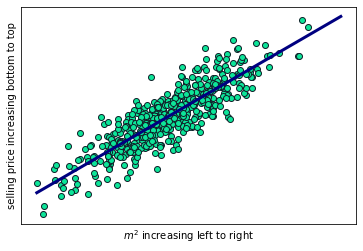

In [68]:
fig, ax = plt.subplots()

ax.scatter(x=X, y=y, color="#0de599", edgecolor="#10222a")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$m^2$ increasing left to right')
ax.set_ylabel('selling price increasing bottom to top')
ax.plot(line_X, predictions, color='navy', label='Linear regressor', linewidth=3)

# Beyond Linear Regression: Polynomial Regression

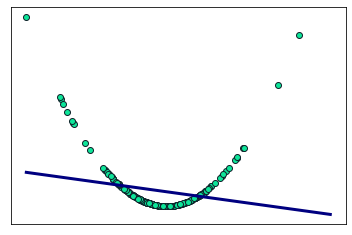

In [69]:
n_samples = 200
X, y = ds.make_regression(n_samples=n_samples, n_features=1, noise=0) 
a = []

# make x^2 curve
for j,i in enumerate(X): 
    a.append(i**2)
y = a


#calculate the model
ones = np.ones((len(X), 1))
X_aug = np.hstack((ones,X))
w = np.dot(np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug)),X_aug.T),y)

# plot the curve
fig, ax = plt.subplots()

ax.scatter(x=X, y=y, color="#0de599", edgecolor="#10222a")
ax.set_xticks([])
ax.set_yticks([])

# plot new datapoints
line_X = np.arange(X.min(), X.max()+1)[:, np.newaxis]
ones = np.ones((len(line_X), 1))
line_X_aug = np.hstack((ones,line_X))
predictions = np.dot(line_X_aug, w)
ax.plot(line_X, predictions, color='navy', label='Linear regressor', linewidth=3)

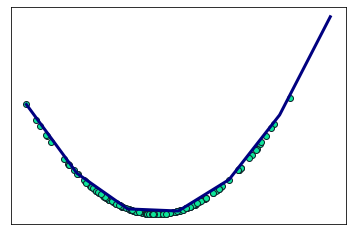

In [70]:
# same as before
n_samples = 200
X, y = ds.make_regression(n_samples=n_samples, n_features=1, noise=0) 
a = []

# make x^2 curve
for j,i in enumerate(X): 
    a.append(i**2)
y = a

# plot the curve
fig, ax = plt.subplots()

ax.scatter(x=X, y=y, color="#0de599", edgecolor="#10222a")
ax.set_xticks([])
ax.set_yticks([])

line_X = np.arange(X.min(), X.max()+1)[:, np.newaxis]


# new stuff
from sklearn.preprocessing import PolynomialFeatures # [x] becomes [x^2,x,1]
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)


# plot new datapoints
line_X_prime = poly.fit_transform(line_X)
predictions = np.dot(line_X_prime, w)
ax.plot(line_X, predictions, color='navy', label='Linear regressor', linewidth=3)